# Models

In [487]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import math
import datetime
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.preprocessing import Imputer

from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

import statsmodels.api as sm
from statsmodels.api import OLS

In [421]:
df_whole = pd.read_csv("../../data/data_clean/clean_accepted_2007_to_2018Q2.csv")

/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (38,48,107,118,119,120,123,124,125,128,134,135,136) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [595]:
def display_df(df, nrows=5, ncols=None):
    with pd.option_context('display.max_rows', nrows, 'display.max_columns', ncols):
        display (df)
#gets ratio of NaNs for each column
def stats_NaN(df):
    df_stats = pd.DataFrame(index=[df.columns], columns=["NaN Ratio"])
    for col in df.columns:
        df_stats["NaN Ratio"][col] = df[col].isna().sum()/len(df) #NaN ratio
    return df_stats.sort_values(by=['NaN Ratio'])

In [544]:
stats_nan = stats_NaN(df_whole)
display_df(stats_nan[stats_nan['NaN Ratio']>0], None)

,NaN Ratio
disbursement_method,1.34725e-05
hardship_flag,1.34725e-05
debt_settlement_flag,1.34725e-05
loan_amnt,1.34725e-05
num_grade,1.34725e-05
total_rec_prncp,1.34725e-05
fico_range_low,1.34725e-05
fico_range_high,1.34725e-05
revol_bal,1.34725e-05
initial_list_status,1.34725e-05


In [424]:
our_drop_list = ['funded_amnt','funded_amnt_inv','int_rate','installment','grade',
                 'pymnt_plan','zip_code','initial_list_status','out_prncp', 'application_type', 'policy_code',
                 'out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int',
                 'total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt',
                 'next_pymnt_d','last_credit_pull_d','last_fico_range_high','last_fico_range_low',
                 'collections_12_mths_ex_med','mths_since_last_major_derog','acc_now_delinq','tot_coll_amt',
                 'tot_cur_bal','open_acc_6m','open_act_il','open_il_12m','open_il_24m','mths_since_rcnt_il',
                 'total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim',
                 'inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal','bc_open_to_buy',
                 'bc_util','chargeoff_within_12_mths','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op',
                 'mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc',
                 'mths_since_recent_bc_dlq','mths_since_recent_inq','mths_since_recent_revol_delinq',
                 'num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl',
                 'num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats','num_tl_120dpd_2m',
                 'num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75',
                 'pub_rec_bankruptcies','tax_liens','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit',
                 'total_il_high_credit_limit','revol_bal_joint','sec_app_fico_range_high',
                 'sec_app_earliest_cr_line','sec_app_inq_last_6mths','sec_app_mort_acc','sec_app_open_acc',
                 'sec_app_revol_util','sec_app_open_act_il','sec_app_num_rev_accts',
                 'sec_app_chargeoff_within_12_mths','sec_app_collections_12_mths_ex_med',
                 'sec_app_mths_since_last_major_derog','hardship_flag','hardship_type','hardship_reason',
                 'hardship_status','deferral_term','hardship_amount','hardship_start_date','hardship_end_date',
                 'payment_plan_start_date','hardship_length','hardship_dpd','hardship_loan_status',
                 'orig_projected_additional_accrued_interest','hardship_payoff_balance_amount',
                 'hardship_last_payment_amount','disbursement_method','debt_settlement_flag',
                 'debt_settlement_flag_date','settlement_status','settlement_date','settlement_amount',
                 'settlement_percentage','settlement_term','loan_status_Charged Off',
                 'loan_status_Current','loan_status_Default',
                 'loan_status_Does not meet the credit policy. Status:Charged Off',
                 'loan_status_Does not meet the credit policy. Status:Fully Paid',
                 'loan_status_Fully Paid','loan_status_In Grace Period','loan_status_Late (16-30 days)',
                 'loan_status_Late (31-120 days)']

In [425]:
df_less_feats = df_whole.drop(columns=our_drop_list)

In [541]:
df_less_feats.columns

Index(['loan_amnt', 'term', 'sub_grade', 'emp_length', 'annual_inc', 'issue_d',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'home_ownership_ANY',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Not Verified',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'addr_state_AK', 'addr_state_AL',
       'addr_state_AR', 'addr_state_AZ', 'addr_state_CA', 'addr_state_CO',
       'addr_st

## Data Augmentation

There might be some value in having a secondary applicant. We will create a new variable from a check on `sec_app_fico_range_low` to detect a secondary applicant. We will also drop the other high NaN proportion features.

In [427]:
def add_secondary(df, label='sec_app_fico_range_low'):
    df['secondary'] = df[label].apply(lambda x: int(not pd.isnull(x)))

In [428]:
add_secondary(df_less_feats)

In [429]:
drop_high_nan_feats = ['annual_inc_joint', 'dti_joint','verification_status_joint','sec_app_fico_range_low']
df_less_feats.drop(columns=drop_high_nan_feats, inplace=True)

In [430]:
display_df(df_less_feats)

,loan_amnt,term,sub_grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,fico_range_low,fico_range_high,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,addr_state_AK,addr_state_AL,addr_state_AR,addr_state_AZ,addr_state_CA,addr_state_CO,addr_state_CT,addr_state_DC,addr_state_DE,addr_state_FL,addr_state_GA,addr_state_HI,addr_state_IA,addr_state_ID,addr_state_IL,addr_state_IN,addr_state_KS,addr_state_KY,addr_state_LA,addr_state_MA,addr_state_MD,addr_state_ME,addr_state_MI,addr_state_MN,addr_state_MO,addr_state_MS,addr_state_MT,addr_state_NC,addr_state_ND,addr_state_NE,addr_state_NH,addr_state_NJ,addr_state_NM,addr_state_NV,addr_state_NY,addr_state_OH,addr_state_OK,addr_state_OR,addr_state_PA,addr_state_RI,addr_state_SC,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,num_grade,secondary
0,15000.0,1.0,C1,10.0,78000.0,2014-12-01,0.1203,0.0,1994-08-01,750.0,754.0,0.0,800.0,800.0,6.0,0.0,138008.0,29.0,17.0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,0
1,10400.0,0.0,A3,8.0,58000.0,2014-12-01,0.1492,0.0,1989-09-01,710.0,714.0,2.0,42.0,800.0,17.0,0.0,6133.0,31.6,36.0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004087,12000.0,0.0,B3,8.0,36000.0,2018-01-01,0.1110,1.0,1998-05-01,685.0,689.0,0.0,21.0,800.0,14.0,0.0,11648.0,43.6,18.0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.4,0
2004088,14000.0,0.0,C2,2.0,80000.0,2018-01-01,0.0135,0.0,2007-07-01,660.0,664.0,1.0,31.0,800.0,11.0,0.0,1461.0,4.1,21.0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.2,0


The FICO scores are defined as a fixed-with range with a range_low and range_high value. Since these two variables are directly dependent, we will combine those into one averaged fico_avg feature.

In [431]:
df_less_feats['fico_avg'] = df_less_feats[['fico_range_low', 'fico_range_high']].mean(axis=1)
df_less_feats.drop(columns=['fico_range_low', 'fico_range_high'], inplace=True)

`earliest_cr_line` may not be itself a useful feature (a date with no context). However it can tell us how long a person has had a credit line open, which is probably useful.

In [432]:
def timedelta_to_day(t):
    if not pd.isnull(t):
        if isinstance(t, int):
            return t
        else:
            return t.days
    else:
        return np.nan

In [433]:
df_less_feats['issue_d'] = pd.to_datetime(df_less_feats['issue_d'])
df_less_feats['earliest_cr_line'] = pd.to_datetime(df_less_feats['earliest_cr_line'])
df_less_feats['cr_line_hist'] = df_less_feats['issue_d'] - pd.to_datetime(df_less_feats['earliest_cr_line'])
df_less_feats['cr_line_hist'] = df_less_feats['cr_line_hist'].apply(timedelta_to_day)

In [434]:
df_less_feats.drop(columns=['earliest_cr_line'],inplace=True)

## Data Prep

We need to deal with NaNs. We can drop the samples for NaN features when the NaN ratio of that feature is small. For the rest, which is just `emp_length`, we'll do mean imputation to keep things simple.

In [435]:
stats_nan_less = stats_NaN(df_less_feats)

In [437]:
df_less_feats.dropna(subset=['issue_d','annual_inc','delinq_2yrs','total_acc','open_acc','pub_rec','cr_line_hist',
               'inq_last_6mths','dti','revol_util'],inplace=True)

In [471]:
stats_nan_less = stats_NaN(df_less_feats)

Most models can't handle datetime objects. So we will convert this to a float.

In [439]:
df_less_feats['issue_d']=df_less_feats['issue_d'].map(datetime.datetime.toordinal)

In [440]:
target = 'num_grade'
target_class = 'sub_grade'
df_train, df_test = train_test_split(df_less_feats, random_state=9001, test_size=0.2, 
                                     stratify=df_less_feats[target_class])

In [441]:
cols_to_imp = ['emp_length']

In [442]:
imp_mean = Imputer(copy=True, missing_values=np.nan, strategy='mean').fit(df_train[cols_to_imp])
df_train[cols_to_imp] = imp_mean.transform(df_train[cols_to_imp])
df_test[cols_to_imp] = imp_mean.transform(df_test[cols_to_imp])

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexin

In [444]:
x_cols = list(set([target,target_class]).symmetric_difference(list(df_train.columns)))
x_train, x_test = df_train[x_cols], df_test[x_cols]
y_train, y_test = df_train[target], df_test[target]
y_train_class, y_test_class = df_train[target_class], df_test[target_class]

Now we can standardize the data.

In [445]:
def standardize(x, x_ref, labels):
    std = np.std(x_ref[labels])
    mean = np.mean(x_ref[labels])
    x_std = (x[labels] - mean)/std
    return x_std

In [446]:
std_labels = ['loan_amnt','total_acc','revol_util','revol_bal','pub_rec','open_acc','mths_since_last_record',
             'mths_since_last_delinq','inq_last_6mths','delinq_2yrs','dti','annual_inc','fico_avg',
             'cr_line_hist','emp_length','issue_d']
x_train_unstand = x_train.copy()
x_train_std = x_train.copy()
x_train_std[std_labels] = standardize(x_train, x_train_unstand, std_labels)

x_test_unstand = x_test.copy()
x_test_std = x_test.copy()
x_test_std[std_labels] = standardize(x_test, x_train_unstand, std_labels)

In [470]:
display_df(x_test_std, 5)

,home_ownership_NONE,home_ownership_OWN,addr_state_VT,addr_state_NJ,issue_d,verification_status_Not Verified,purpose_home_improvement,addr_state_CT,addr_state_AR,addr_state_OK,addr_state_NE,addr_state_RI,addr_state_MI,addr_state_CA,addr_state_MS,pub_rec,addr_state_KY,annual_inc,delinq_2yrs,addr_state_IA,open_acc,addr_state_WI,emp_length,purpose_educational,term,loan_amnt,dti,addr_state_DE,addr_state_HI,addr_state_NM,addr_state_KS,addr_state_IL,mths_since_last_record,addr_state_PA,revol_bal,purpose_credit_card,addr_state_WA,addr_state_OH,revol_util,addr_state_TN,secondary,home_ownership_OTHER,addr_state_SC,inq_last_6mths,addr_state_ID,verification_status_Verified,addr_state_WV,purpose_moving,cr_line_hist,fico_avg,addr_state_VA,addr_state_GA,addr_state_AL,addr_state_MN,home_ownership_ANY,addr_state_AK,purpose_debt_consolidation,purpose_medical,addr_state_FL,addr_state_LA,home_ownership_MORTGAGE,addr_state_NC,addr_state_ME,purpose_car,addr_state_IN,addr_state_MA,addr_state_MT,addr_state_DC,addr_state_OR,addr_state_ND,purpose_major_purchase,addr_state_AZ,total_acc,addr_state_MD,purpose_vacation,addr_state_UT,addr_state_WY,mths_since_last_delinq,addr_state_NV,purpose_house,addr_state_TX,purpose_renewable_energy,addr_state_SD,verification_status_Source Verified,addr_state_NH,purpose_wedding,addr_state_MO,addr_state_CO,purpose_small_business,home_ownership_RENT,addr_state_NY,purpose_other
1955928,0,0,0,0,1.218230,1,0,1,0,0,0,0,0,0,0,-0.350171,0,-0.029497,-0.359691,0,-0.648512,0,-2.863524e-01,0,0.0,-0.543836,-0.473508,0,0,0,0,0,0.441931,0,0.038388,0,0,0,1.450860,0,0,0,0,-0.658735,0,0,0,0,-1.418433,-0.695487,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-1.369610,0,0,0,0,0.986977,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1033990,0,1,0,0,0.625655,0,0,0,0,0,0,0,0,0,0,-0.350171,0,0.079481,0.774675,0,0.066341,0,-1.309037e-12,0,1.0,1.179385,0.210531,0,0,0,0,0,0.441931,0,0.715214,0,0,0,0.751638,0,0,0,0,0.446714,0,1,0,0,2.242055,-0.695487,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0.973425,0,0,0,0,-1.046213,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417463,0,0,0,0,0.869179,0,0,0,0,0,0,0,0,0,0,1.341702,0,-0.660959,-0.359691,0,-0.827225,0,-1.309037e-12,0,0.0,-1.096150,0.850730,0,0,0,0,0,-2.222259,0,-0.611697,0,0,1,0.044284,0,0,0,0,0.446714,0,1,0,0,0.007396,-1.155934,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.867531,0,0,0,0,-1.033163,0,0,0,0,0,0,0,0,0,0,0,1,0,0
839523,0,0,0,0,-1.353386,1,0,0,0,0,0,0,0,0,0,-0.350171,0,-0.224676,-0.359691,0,0.066341,0,5.644333e-01,0,0.0,-1.096150,-0.236929,0,0,0,0,0,0.441931,0,-0.603989,0,0,0,-1.146834,0,0,0,0,0.446714,0,0,0,0,-0.177274,0.685857,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0.555026,0,0,0,0,-0.996623,0,0,0,0,0,0,0,0,0,0,0,0,0,0


The regression to classification function:

In [531]:
def myround(x, prec=2, base=0.2):
    return round(base * round(float(x)/base),prec)
    
def num_to_subgrade(num):
    if not pd.isnull(num):
        carry = 0
        sub = round((myround(num) - math.floor(num))/0.2)+1
        if sub==6:
            carry=1
            sub=1
        letter = {
            0:'A', 1:'B', 2:'C', 3:'D', 4:'E', 5:'F', 6:'G',
        }.get(math.floor(num)+carry)
        if letter == None:
            if num<0:
                letter = 'A' #if negative num
                sub = 1
            elif num>6:
                letter = 'G'
                sub = 5
        return letter+str(sub)
    else:
        return np.nan

def subgrade_to_num(grade):
    if not pd.isnull(grade):
        letter = grade[0]
        num = int(grade[1])
        num_grade = {
            'A':0,'B':1,'C':2,'D':3,'E':4,'F':5,'G':6
        }.get(letter)  
        num_grade += (num-1)*0.2
        return num_grade
    else:
        return np.nan

We want to be able to check for accuracy within a margin of error, so we construct a function to do so:

In [450]:
def acc_within_delta (y1, y2, delta = 0.5 ):
    deltas = pd.Series.abs(y1 - y2)
    in_range = (deltas <= delta)
    accuracy = np.sum(in_range.values)/len(y1)
    return accuracy

## Models

In [451]:
x_train = x_train_std.copy()
x_test = x_test_std.copy()

In [452]:
display_df(x_train)

,home_ownership_NONE,home_ownership_OWN,addr_state_VT,addr_state_NJ,issue_d,verification_status_Not Verified,purpose_home_improvement,addr_state_CT,addr_state_AR,addr_state_OK,addr_state_NE,addr_state_RI,addr_state_MI,addr_state_CA,addr_state_MS,pub_rec,addr_state_KY,annual_inc,delinq_2yrs,addr_state_IA,open_acc,addr_state_WI,emp_length,purpose_educational,term,loan_amnt,dti,addr_state_DE,addr_state_HI,addr_state_NM,addr_state_KS,addr_state_IL,mths_since_last_record,addr_state_PA,revol_bal,purpose_credit_card,addr_state_WA,addr_state_OH,revol_util,addr_state_TN,secondary,home_ownership_OTHER,addr_state_SC,inq_last_6mths,addr_state_ID,verification_status_Verified,addr_state_WV,purpose_moving,cr_line_hist,fico_avg,addr_state_VA,addr_state_GA,addr_state_AL,addr_state_MN,home_ownership_ANY,addr_state_AK,purpose_debt_consolidation,purpose_medical,addr_state_FL,addr_state_LA,home_ownership_MORTGAGE,addr_state_NC,addr_state_ME,purpose_car,addr_state_IN,addr_state_MA,addr_state_MT,addr_state_DC,addr_state_OR,addr_state_ND,purpose_major_purchase,addr_state_AZ,total_acc,addr_state_MD,purpose_vacation,addr_state_UT,addr_state_WY,mths_since_last_delinq,addr_state_NV,purpose_house,addr_state_TX,purpose_renewable_energy,addr_state_SD,verification_status_Source Verified,addr_state_NH,purpose_wedding,addr_state_MO,addr_state_CO,purpose_small_business,home_ownership_RENT,addr_state_NY,purpose_other
806155,0,1,0,0,-1.254353,1,0,0,0,0,0,0,0,0,0,-0.350171,0,-0.603553,-0.359691,0,-1.005938,0,-1.420733,0,0.0,-0.985687,-0.585373,0,0,0,0,0,0.441931,0,-0.574287,0,0,0,0.743507,0,0,0,0,-0.658735,0,0,0,0,-1.604178,-0.388521,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,-1.369610,0,0,0,0,0.986977,0,0,0,0,0,0,0,0,0,0,0,0,0,0
261548,0,0,0,0,-3.181442,1,0,0,0,0,0,0,0,0,0,-0.350171,0,0.073833,-0.359691,0,-0.827225,0,-0.853543,0,0.0,-0.764761,-0.718401,0,0,0,0,0,0.441931,0,-0.566448,0,0,0,-0.150848,0,0,0,0,3.763061,0,0,0,0,-0.852611,1.299788,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.722385,0,0,0,0,0.986977,0,0,1,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361578,0,0,0,0,0.919507,0,0,0,0,0,0,0,0,0,0,-0.350171,0,1.118614,-0.359691,0,0.245054,0,1.131624,0,1.0,1.775885,-0.589152,0,0,0,0,0,0.441931,1,0.743653,0,0,0,0.849203,0,0,0,0,0.446714,0,1,0,0,1.925323,0.839340,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.471346,0,0,0,0,-1.020113,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1007988,0,0,0,0,0.671113,0,0,0,0,0,0,0,0,1,0,-0.350171,0,-0.316525,0.774675,0,-0.827225,0,1.131624,0,0.0,-0.168262,-0.326118,0,0,0,0,0,0.441931,0,-0.725409,0,0,0,-2.077776,0,0,0,0,-0.658735,0,1,0,0,0.508441,1.913718,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,-0.783852,0,0,0,0,-1.048823,0,0,0,0,0,0,0,0,0,0,0,0,0,1


### Baseline Model - Linear Regression (OLS)

In [35]:
X_train = sm.add_constant(x_train)
X_test = sm.add_constant(x_test)
model_OLS = OLS(y_train, X_train.astype(float)).fit()

In [36]:
OLS_train_pred = model_OLS.predict(X_train)
OLS_test_pred = model_OLS.predict(X_test)

In [534]:
score_OLS_train = r2_score(y_train,OLS_train_pred)
score_OLS_test = r2_score(y_test,OLS_test_pred)
# mse_OLS_train = sm.tools.eval_measures.mse( y_train,OLS_train_pred)
# mse_OLS_test = sm.tools.eval_measures.mse( y_test, OLS_test_pred)
acc_OLS_train = accuracy_score(y_train_class,OLS_train_pred.apply(num_to_subgrade))
acc_OLS_test = accuracy_score(y_test_class, OLS_test_pred.apply(num_to_subgrade))
acc_OLS_grade_train = acc_within_delta(y_train,OLS_train_pred, 1)
acc_OLS_grade_test = acc_within_delta(y_test,OLS_test_pred, 1)
 
print('OLS regression score on the training set is %.6f'%score_OLS_train)
print('OLS regression score on the test set is %.6f'%score_OLS_test)
#print('OLS mean squared error on the training set is %.6f'%mse_OLS_train)
#print('OLS mean squared error on the test set is %.6f'%mse_OLS_test)
print('OLS Classification accuracy of exact sub-grade (A1-G5) on the training set is {0:.1%}'.format(acc_OLS_train))
print('OLS Classification accuracy of exact sub-grade on the test set is {0:.1%}'.format(acc_OLS_test))
print('OLS Classification accuracy within one grade (A-G) on the training set is {0:.1%}'.format(acc_OLS_grade_train))
print('OLS Classification accuracy within one grade on the test set is {0:.1%}'.format(acc_OLS_grade_test))


OLS regression score on the training set is 0.484819
OLS regression score on the test set is 0.479947
OLS Classification accuracy of exact sub-grade (A1-G5) on the training set is 9.6%
OLS Classification accuracy of exact sub-grade on the test set is 9.6%
OLS Classification accuracy within one grade (A-G) on the training set is 75.4%
OLS Classification accuracy within one grade on the test set is 75.4%


In [620]:
def my_box_plot(y_true, y_pred, model_name):   
    fig, ax = plt.subplots(figsize=(16,7))
    sns.boxplot(y_true, y_pred)
    plt.ylim(-10, 20)
    plt.tight_layout()
    ax.set_xticklabels([num_to_subgrade(x) for x in np.linspace(0,6.8, 35)])
    plt.xlabel("True Rating")
    plt.ylabel("Predicted Rating")
    plt.title("Box Plot for "+model_name+" Model of Predicted vs True Rating on Test Set")

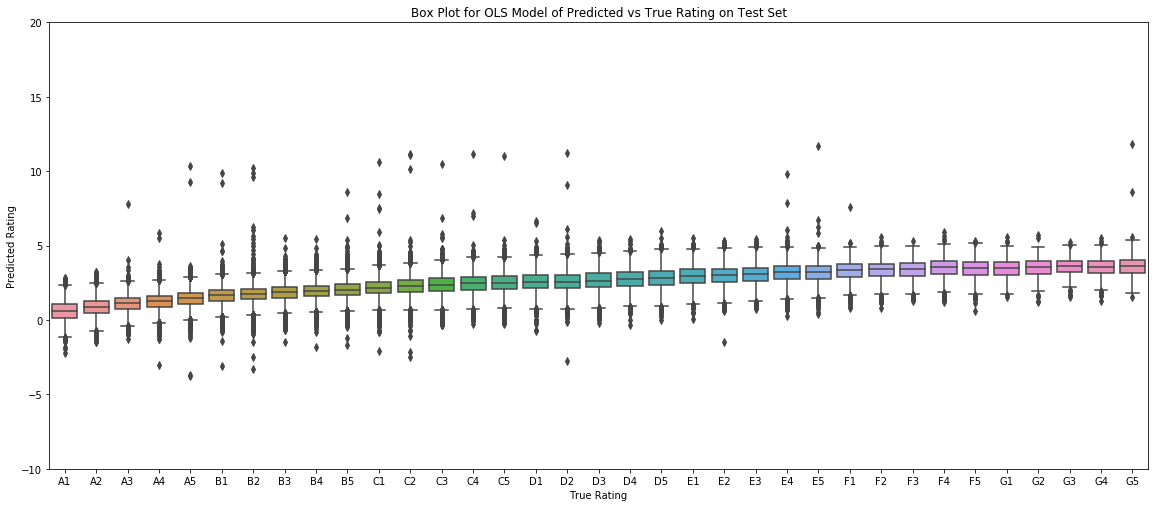

In [575]:
my_box_plot(y_test, OLS_test_pred, "OLS")

### Regularization Linear Models - Lasso and Ridge

In [536]:
model_Lasso = LassoCV(cv=5, random_state=9001).fit(x_train,y_train)

In [537]:
Lasso_train_pred = model_Lasso.predict(x_train)
Lasso_test_pred = model_Lasso.predict(x_test)

In [538]:
score_Lasso_train = model_Lasso.score(x_train,y_train)
score_Lasso_test = model_Lasso.score(x_test,y_test)
acc_Lasso_train = accuracy_score(y_train_class,[num_to_subgrade(x) for x in Lasso_train_pred])
acc_Lasso_test = accuracy_score(y_test_class,[num_to_subgrade(x) for x in Lasso_test_pred])

acc_Lasso_grade_train = acc_within_delta(y_train,Lasso_train_pred, 1)
acc_Lasso_grade_test = acc_within_delta(y_test,Lasso_test_pred, 1)

In [553]:
print('Lasso regression score on the training set is %.6f'%score_Lasso_train)
print('Lasso regression score on the test set is %.6f'%score_Lasso_test)
print('Lasso classification accuracy of exact sub-grade (A1-G5) on the training set with Lasso is %.6f'%acc_Lasso_train)
print('Lasso classification accuracy of exact sub-grade on the test set is %.6f'%acc_Lasso_test)
print('Lasso classification accuracy within one grade on the training set is {0:.3%}'.format(acc_Lasso_grade_train))
print('Lasso classification accuracy within one grade on the test set is {0:.3%}'.format(acc_Lasso_grade_test))

Lasso regression score on the training set is 0.471872
Lasso regression score on the test set is 0.466649
Lasso classification accuracy of exact sub-grade (A1-G5) on the training set with Lasso is 0.093893
Lasso classification accuracy of exact sub-grade on the test set is 0.094168
Lasso classification accuracy within one grade on the training set is 74.869%
Lasso classification accuracy within one grade on the test set is 74.946%


In [619]:
#prints dataframe of sorted coefficients by magnitude to explore individual feature effects on subgrade
df_Lasso_coefs = pd.DataFrame()
df_Lasso_coefs['coef_abs'] = abs(model_Lasso.coef_)
df_Lasso_coefs['coef'] = model_Lasso.coef_
df_Lasso_coefs['feature'] = x_train.columns
df_Lasso_coefs = df_Lasso_coefs.sort_values(by="feature")
display_df(df_Lasso_coefs.sort_values(by='coef_abs', ascending=False), None)

,coef_abs,coef,feature
24,1.081162,1.081162,term
35,0.664206,-0.664206,purpose_credit_card
49,0.458300,-0.458300,fico_avg
88,0.336825,0.336825,purpose_small_business
56,0.285840,-0.285840,purpose_debt_consolidation
45,0.239996,0.239996,verification_status_Verified
6,0.230999,-0.230999,purpose_home_improvement
63,0.228658,-0.228658,purpose_car
43,0.220070,0.220070,inq_last_6mths
70,0.173402,-0.173402,purpose_major_purchase


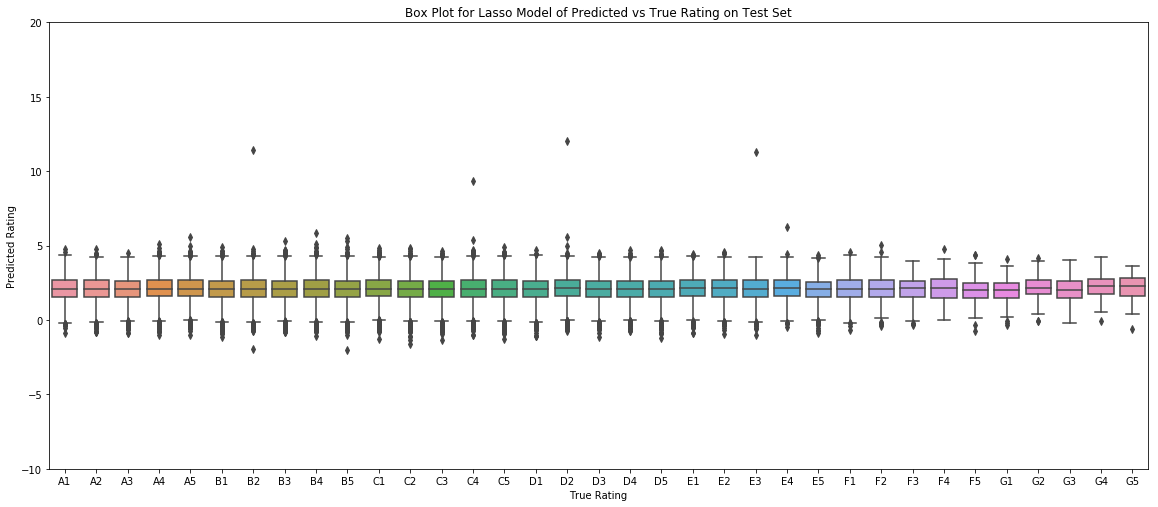

In [621]:
my_box_plot(y_test, Lasso_test_pred, "Lasso")

In [556]:
model_Ridge = RidgeCV(cv=5).fit(x_train,y_train)

In [557]:
Ridge_train_pred = model_Ridge.predict(x_train)
Ridge_test_pred = model_Ridge.predict(x_test)

In [558]:
score_Ridge_train = model_Ridge.score(x_train,y_train)
score_Ridge_test = model_Ridge.score(x_test,y_test)
acc_Ridge_train = accuracy_score(y_train_class,[num_to_subgrade(x) for x in Ridge_train_pred])
acc_Ridge_test = accuracy_score(y_test_class,[num_to_subgrade(x) for x in Ridge_test_pred])

acc_Ridge_grade_train = acc_within_delta(y_train,Ridge_train_pred, 1)
acc_Ridge_grade_test = acc_within_delta(y_test,Ridge_test_pred, 1)

In [559]:
print('Ridge regression score on the training set is %.6f'%score_Ridge_train)
print('Ridge regression score on the test set is %.6f'%score_Ridge_test)
print('Ridge classification accuracy on the training set with Ridge is %.6f'%acc_Ridge_train)
print('Ridge classification accuracy on the test set is %.6f'%acc_Ridge_test)
print('Ridge classification accuracy within one grade on the training set is {0:.1%}'.format(acc_Ridge_grade_train))
print('Ridge classification accuracy within one grade on the test set is {0:.1%}'.format(acc_Ridge_grade_test))

Ridge regression score on the training set is 0.472266
Ridge regression score on the test set is 0.466965
Ridge classification accuracy on the training set with Ridge is 0.094157
Ridge classification accuracy on the test set is 0.094387
Ridge classification accuracy within one grade on the training set is 74.9%
Ridge classification accuracy within one grade on the test set is 75.0%


In [600]:
#prints dataframe of sorted coefficients by magnitude to explore individual feature effects on subgrade
df_Ridge_coefs = pd.DataFrame()
df_Ridge_coefs['coef_abs'] = abs(model_Ridge.coef_)
df_Ridge_coefs['coef'] = model_Ridge.coef_
df_Ridge_coefs['feature'] = x_train.columns
display_df(df_Ridge_coefs.sort_values(by='coef_abs', ascending=False), None)

,coef_abs,coef,feature
24,1.083696,1.083696,term
35,0.608427,-0.608427,purpose_credit_card
49,0.458541,-0.458541,fico_avg
88,0.441641,0.441641,purpose_small_business
19,0.342354,0.342354,addr_state_IA
81,0.274133,0.274133,purpose_renewable_energy
47,0.249557,0.249557,purpose_moving
56,0.229516,-0.229516,purpose_debt_consolidation
60,0.223898,-0.223898,home_ownership_MORTGAGE
43,0.221002,0.221002,inq_last_6mths


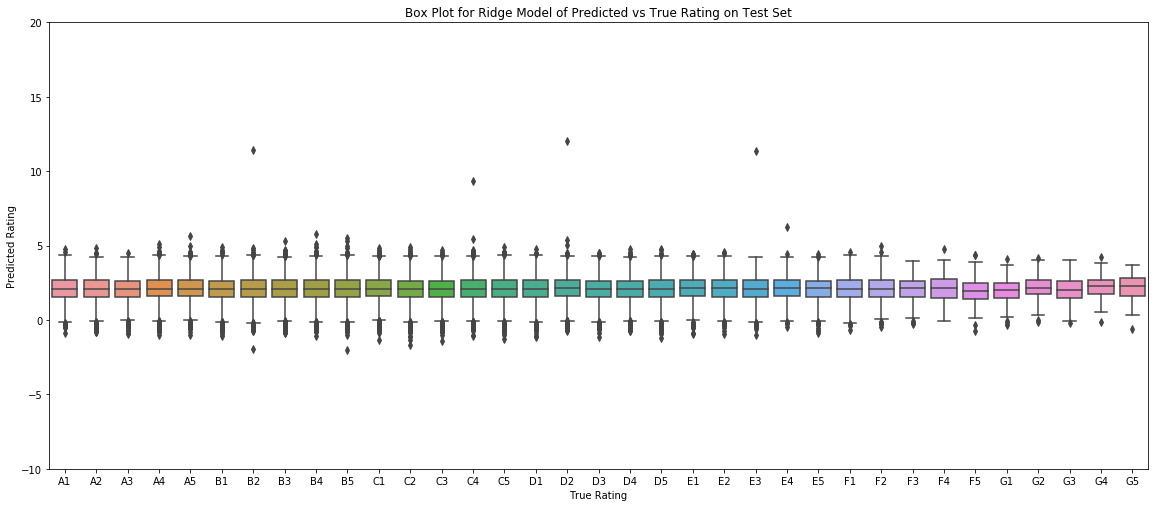

In [622]:
my_box_plot(y_test, Ridge_test_pred, "Ridge")

### Decision Tree

In [455]:
depths = {'max_depth' : [5,10,15,20]}

In [456]:
model_DTR_grid  = GridSearchCV(DecisionTreeRegressor(), depths, cv = 5)
model_DTR_grid.fit(x_train, y_train)

model_DTR = DecisionTreeRegressor(max_depth=model_DTR_grid.best_params_['max_depth'])
model_DTR.fit(x_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=15, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [566]:
print("Best DTR had max_depth: %i"%model_DTR_grid.best_params_['max_depth'])
DTR_train_pred = model_DTR.predict(x_train)
acc_model_DTR_train = accuracy_score(y_train_class,[num_to_subgrade(x) for x in DTR_train_pred])
print('Accuracy on training set for Decision Tree classifier is %f' %acc_model_DTR_train)
DTR_test_pred = model_DTR.predict(x_test)
acc_model_DTR_test = accuracy_score(y_test_class,[num_to_subgrade(x) for x in DTR_test_pred])
print('Accuracy on test set for Decision Tree classifier is %f' %acc_model_DTR_test)

acc_DTR_grade_train = acc_within_delta(y_train,DTR_train_pred, 1)
acc_DTR_grade_test = acc_within_delta(y_test,DTR_test_pred, 1)
print('Decision Tree classification accuracy within one grade on the training set is %f'%acc_DTR_grade_train)
print('Decision Tree classification accuracy within one grade on the test set is %f'%acc_DTR_grade_test)


model_DTR_sig_feats = np.argsort(model_DTR.feature_importances_)[::-1]
print('\nSignificant predictors are: ')

for i in range(10):
    print(x_test.columns[model_DTR_sig_feats[i]])

print('\nTotal Number of Predictors is %d' %np.sum(model_DTR.feature_importances_> 0))

Best DTR had max_depth: 15
Accuracy on training set for Decision Tree classifier is 0.112296
Accuracy on test set for Decision Tree classifier is 0.099371
Decision Tree classification accuracy within one grade on the training set is 0.797906
Decision Tree classification accuracy within one grade on the test set is 0.766039

Significant predictors are: 
fico_avg
term
issue_d
dti
inq_last_6mths
annual_inc
purpose_credit_card
loan_amnt
verification_status_Verified
revol_util

Total Number of Predictors is 90


In [578]:
x_test.columns[model_DTR_sig_feats]

Index(['fico_avg', 'term', 'issue_d', 'dti', 'inq_last_6mths', 'annual_inc',
       'purpose_credit_card', 'loan_amnt', 'verification_status_Verified',
       'revol_util', 'revol_bal', 'verification_status_Not Verified',
       'cr_line_hist', 'total_acc', 'purpose_debt_consolidation', 'open_acc',
       'purpose_other', 'mths_since_last_delinq', 'purpose_small_business',
       'home_ownership_MORTGAGE', 'emp_length', 'secondary',
       'verification_status_Source Verified', 'mths_since_last_record',
       'purpose_home_improvement', 'home_ownership_RENT', 'delinq_2yrs',
       'purpose_major_purchase', 'addr_state_NY', 'pub_rec', 'purpose_house',
       'purpose_moving', 'home_ownership_OWN', 'addr_state_CA',
       'addr_state_NJ', 'purpose_car', 'addr_state_FL', 'addr_state_GA',
       'addr_state_IL', 'addr_state_MD', 'addr_state_CO', 'addr_state_NV',
       'addr_state_TX', 'addr_state_VA', 'addr_state_NC', 'addr_state_CT',
       'addr_state_IN', 'addr_state_PA', 'addr_state_

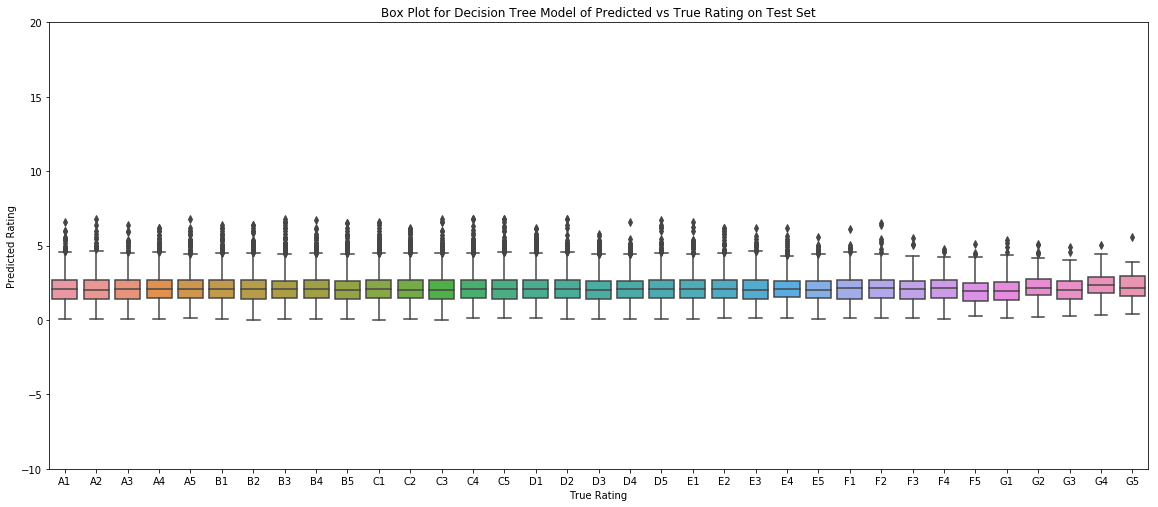

In [623]:
my_box_plot(y_test, DTR_test_pred, "Decision Tree")

### Random Forest

In [ ]:
params = {'max_depth' : [10,12,15,17,20], 'n_estimators': [15,30,40,45,50]}

In [ ]:
model_RF_grid  = GridSearchCV(RandomForestClassifier(), params, cv = 5)
model_RF_grid.fit(x_train, y_train_class)

In [472]:
model_RF = RandomForestClassifier(n_estimators=50,
                                  max_depth=10)
model_RF.fit(x_train, y_train_class)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [569]:
acc_model_RF_train = model_RF.score(x_train, y_train_class)
print('Accuracy on training set for Decision Tree classifier is %f' %acc_model_RF_train)
acc_model_RF_test = model_RF.score(x_test, y_test_class)
print('Accuracy on test set for Decision Tree classifier is %f' %acc_model_RF_test)

RF_train_pred = model_RF.predict(x_train)
acc_RF_train = acc_within_delta(y_train, [subgrade_to_num(x) for x in RF_train_pred], 1)
RF_test_pred = model_RF.predict(x_test)
acc_RF_test = acc_within_delta(y_test, [subgrade_to_num(x) for x in RF_test_pred],1 )

print("Best RF had max_depth: %i"%model_RF_grid.best_params_['max_depth'] + " and n_estimators: %i"%model_RF_grid.best_params_['n_estimators'])

print('Random Forest classification accuracy within one grade on the training set is %.5f'%acc_RF_train)
print('Random Forest classification accuracy within one grade on the test set is %.5f'%acc_RF_test)


model_RF_sig_feats = np.argsort(model_RF.feature_importances_)[::-1]
print('\nSignificant predictors are: ')
for i in range(10):
    print(x_test.columns[model_RF_sig_feats[i]])

print('\nTotal Number of Predictors is %d' %np.sum(model_RF.feature_importances_> 0))

Accuracy on training set for Decision Tree classifier is 0.135798
Accuracy on test set for Decision Tree classifier is 0.123235
Best RF had max_depth: 17 and n_estimators: 50
Random Forest classification accuracy within one grade on the training set is 0.74813
Random Forest classification accuracy within one grade on the test set is 0.74717

Significant predictors are: 
fico_avg
term
revol_util
verification_status_Not Verified
issue_d
inq_last_6mths
dti
loan_amnt
annual_inc
verification_status_Verified

Total Number of Predictors is 92


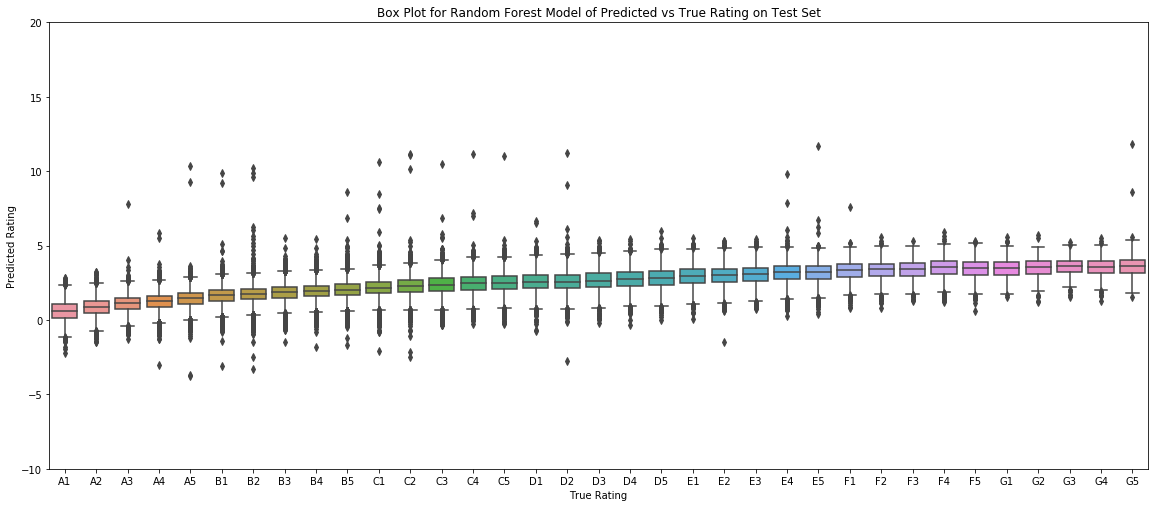

In [571]:
my_box_plot(y_test, RF_test_pred, "Random Forest")

### Logistic Regression

In [462]:
model_LR = LogisticRegression().fit(x_train,y_train_class)

In [469]:
LR_train_pred = model_LR.predict(x_train)
acc_LR_train = acc_within_delta(y_train, [subgrade_to_num(x) for x in LR_train_pred], 1)
LR_test_pred = model_LR.predict(x_test)
acc_LR_test = acc_within_delta(y_test, [subgrade_to_num(x) for x in LR_test_pred],1 )

print('Classification accuracy within one grade on the training set is %.5f'%acc_LR_train)
print('Classification accuracy within one grade on the test set is %.5f'%acc_LR_test)

Classification accuracy within one grade on the training set is 0.75370
Classification accuracy within one grade on the test set is 0.75386


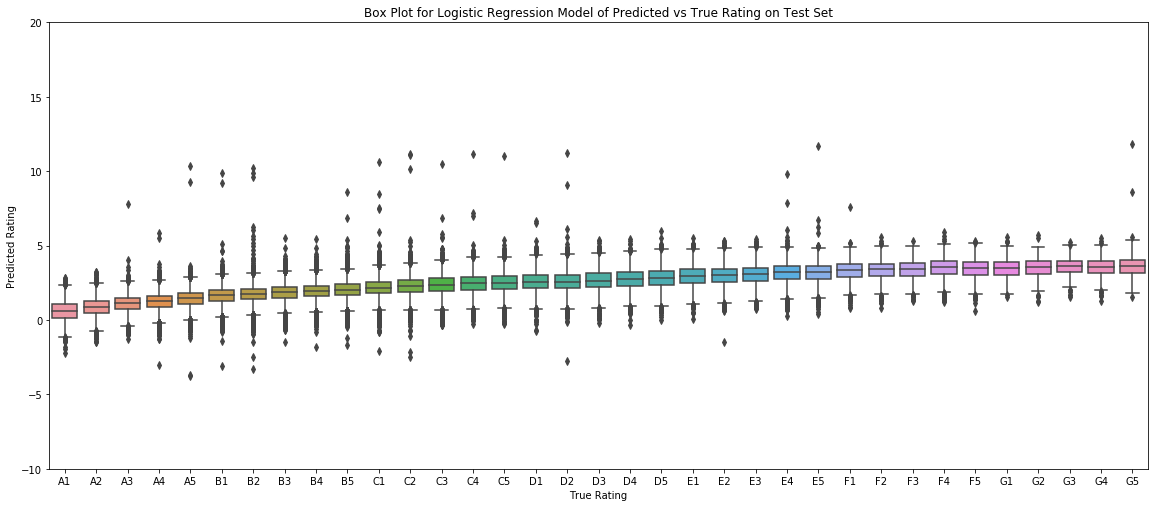

In [576]:
my_box_plot(y_test, LR_test_pred, "Logistic Regression")

### Simple OLS

We took significant features from the decision tree and used them to run a simplified OLS model.

In [481]:
sig_feats = ['fico_avg','issue_d','loan_amnt','term','revol_util','dti','annual_inc','cr_line_hist',
             'revol_bal','open_acc']

In [483]:
model_OLS_sig = OLS(y_train, X_train[sig_feats].astype(float)).fit()

In [485]:
OLS_sig_train_pred = model_OLS_sig.predict(X_train[sig_feats])
OLS_sig_test_pred = model_OLS_sig.predict(X_test[sig_feats])

In [540]:
acc_OLS_sig_train = acc_within_delta(y_train,OLS_sig_train_pred, 1)
acc_OLS_sig_test = acc_within_delta(y_test,OLS_sig_test_pred, 1)
print('Classification accuracy within one grade on the training set is %.5f'%acc_OLS_sig_train)
print('Classification accuracy within one grade on the test set is %.5f'%acc_OLS_sig_test)

Classification accuracy within one grade on the training set is 0.36382
Classification accuracy within one grade on the test set is 0.36324
